In [1]:
! pip install tensorflow

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [8]:
img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale=1/255.0)

In [12]:
train_data_gen = datagen.flow_from_directory(directory='C:/Users/richa/Downloads/archive (1)/archive/TB_Chest_Radiography_Database/Split_data/train',
                                             target_size = (img_width, img_height),
                                             class_mode = 'sparse')
test_data_gen = datagen.flow_from_directory(directory='C:/Users/richa/Downloads/archive (1)/archive/TB_Chest_Radiography_Database/Split_data/test',
                                           target_size = (img_width, img_height),
                                           class_mode = 'sparse',)
val_data_gen = datagen.flow_from_directory(directory='C:/Users/richa/Downloads/archive (1)/archive/TB_Chest_Radiography_Database/Split_data/val',
                                           target_size = (img_width, img_height),
                                           class_mode = 'sparse',)

Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


In [13]:
model = Sequential()

#convolution 
model.add(Conv2D(32, (3,3), input_shape = (img_width, img_height, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(192, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))


#Dense 
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(228, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(270, activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
r = model.fit_generator(generator=train_data_gen,
                           steps_per_epoch=len(train_data_gen),
                           epochs=10,
                           validation_data= val_data_gen,
                           validation_steps = len(val_data_gen))

C:\Users\richa\AppData\Local\Temp\ipykernel_23128\3956367786.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(generator=train_data_gen,


Epoch 1/10


105/105 [==============================] - 93s 867ms/step - loss: 0.3149 - accuracy: 0.8417 - val_loss: 0.3021 - val_accuracy: 0.8762
Epoch 2/10
105/105 [==============================] - 89s 846ms/step - loss: 0.1968 - accuracy: 0.9262 - val_loss: 0.1193 - val_accuracy: 0.9548
Epoch 3/10
105/105 [==============================] - 91s 870ms/step - loss: 0.0871 - accuracy: 0.9679 - val_loss: 0.1124 - val_accuracy: 0.9524
Epoch 4/10
105/105 [==============================] - 84s 801ms/step - loss: 0.0613 - accuracy: 0.9792 - val_loss: 0.0937 - val_accuracy: 0.9786
Epoch 5/10
105/105 [==============================] - 80s 764ms/step - loss: 0.0445 - accuracy: 0.9839 - val_loss: 0.0757 - val_accuracy: 0.9833
Epoch 6/10
105/105 [==============================] - 80s 761ms/step - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.0678 - val_accuracy: 0.9929
Epoch 7/10
105/105 [==============================] - 81s 768ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0685 - val_

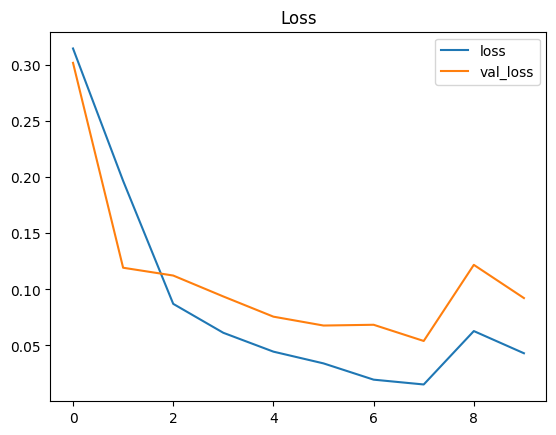

In [16]:
plt.title('Loss')
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

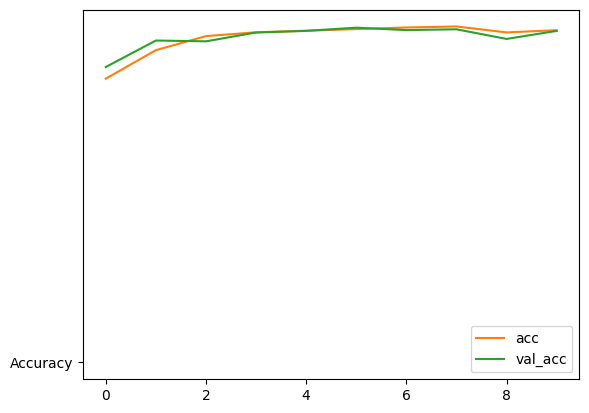

In [17]:
plt.plot('Accuracy')
plt.plot(r.history['accuracy'], label= 'acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
model.save('Tuberculosis_new.h5')

c:\Users\richa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model = tf.keras.models.load_model("Tuberculosis_new.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('Tuberculosis.tflite_new', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\richa\AppData\Local\Temp\tmp1_7q2amw\assets


INFO:tensorflow:Assets written to: C:\Users\richa\AppData\Local\Temp\tmp1_7q2amw\assets


9593220

In [20]:
loss,acc = model.evaluate(test_data_gen)

np.save('model_acc_new',acc)

14/14 [==============================] - 5s 361ms/step - loss: 0.0454 - accuracy: 0.9857
